### Comparison of DYAMOND and ERA5 data (both coarse-grained to R2B5)

In [1]:
import os
import time
import xarray as xr
import numpy as np
import psyplot.project as psy
import matplotlib as mpl
import matplotlib.pyplot as plt

psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [10., 8.]

In [2]:
path_dya = "~/bd1179_work/DYAMOND/hvcg_data/"
path_era5 = "~/bd1179_work/ERA5/hvcg_data/"

In [3]:
# One month
days_dya = '202002'
days_era5 = '2020-02-'

#### Cloud Cover

In [4]:
cl_vol_dya_ds = xr.open_mfdataset(path_dya + 'clc/*' + days_dya + '*', combine='by_coords')
cl_area_dya_ds = xr.open_mfdataset(path_dya + 'cl_area/*' + days_dya + '*', combine='by_coords')
cc_era5_ds = xr.open_mfdataset(path_era5 + 'cc/*' + days_era5 + '*', combine='by_coords')

In [5]:
# Hourly ERA5 data
cc_era5_hourly = cc_era5_ds.cc.values

cl_vol_dya = np.reshape(cl_vol_dya_ds.clc.values, -1)
cl_area_dya = np.reshape(cl_area_dya_ds.cl_area.values, -1)
# Convert ERA5 data into three-hourly data
cc_era5 = np.reshape(cc_era5_hourly[0::3], -1)

# Commented out for all data
# cc_era5 = cc_era5[:len(cl_vol_dya)]
# assert len(cc_era5) == len(cl_vol_dya)

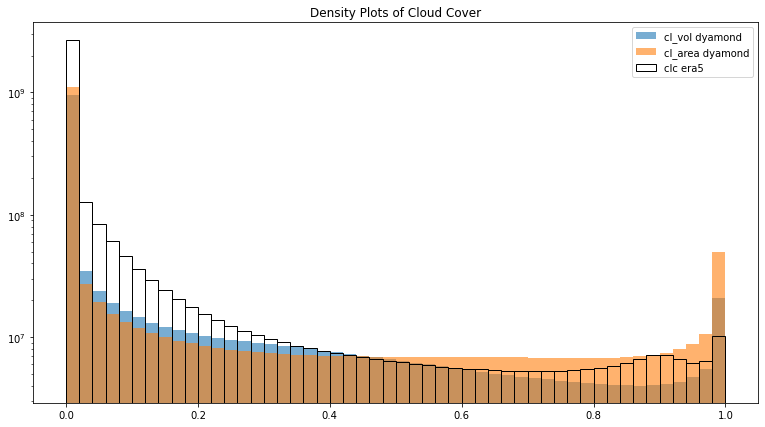

In [13]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111, title='Density Plots of Cloud Cover')
ax.hist(cl_vol_dya, bins=50, alpha=.6, log=True)
ax.hist(cl_area_dya, bins=50, alpha=.6, log=True)
ax.hist(cc_era5, bins=50, log=True, fill=False)

plt.legend(['cl_vol dyamond', 'cl_area dyamond', 'clc era5'])
plt.savefig('cloud_cover.pdf')

Difference (absolute and relative) of ERA5 and DYAMOND cloud cover

In [51]:
%%bash

. ~/.bashrc

# Average ERA5 cloud cover
cd ~/bd1179_work/ERA5/hvcg_data/stats
cdo timmean -mergetime ~/bd1179_work/ERA5/hvcg_data/cc/*2020-02* cc_mean_2020-02.nc

# Average DYAMOND cloud cover
cd ~/bd1179_work/DYAMOND/hvcg_data
cdo timmean -mergetime ~/bd1179_work/DYAMOND/hvcg_data/clc/*202002* clc_mean_202002.nc

target_grid="/pool/data/ICON/grids/public/mpim/0019/icon_grid_0019_R02B05_G.nc"

# Compute the difference of the mean
cd ~/bd1179_work/ERA5/hvcg_data/stats
cdo sub clc_mean_2020-02.nc ~/bd1179_work/DYAMOND/hvcg_data/clc_mean_202002.nc clc_mean_202002_era5-dyamond_nogrid.nc
cdo setgrid,${target_grid} clc_mean_202002_era5-dyamond_nogrid.nc clc_mean_202002_era5-dyamond.nc
\rm clc_mean_202002_era5-dyamond_nogrid.nc

# Extract specific levels
cdo sellevidx,10 clc_mean_202002_era5-dyamond.nc clc_mean_202002_era5-dyamond_10.nc
cdo sellevidx,20 clc_mean_202002_era5-dyamond.nc clc_mean_202002_era5-dyamond_20.nc
cdo sellevidx,30 clc_mean_202002_era5-dyamond.nc clc_mean_202002_era5-dyamond_30.nc

# Relative difference. First we need to average over all horizontal fields, otherwise we will divide by 0 too often.
cdo fldmean clc_mean_2020-02.nc clc_mean_2020-02_fldmean.nc
# cdo div clc_mean_202002_era5-dyamond.nc clc_mean_2020-02_fldmean.nc clc_mean_202002_era5-dyamond_relative.nc # Won't run
# The constants are taken from clc_mean_2020-02_fldmean.nc
cdo divc,0.070022 clc_mean_202002_era5-dyamond_10.nc clc_mean_202002_era5-dyamond_relative_10.nc
cdo divc,0.069612 clc_mean_202002_era5-dyamond_20.nc clc_mean_202002_era5-dyamond_relative_20.nc
cdo divc,0.030975 clc_mean_202002_era5-dyamond_30.nc clc_mean_202002_era5-dyamond_relative_30.nc

cdo(1) mergetime: Process started
cdo(1) mergetime: Processed 1767505920 values from 29 variables over 696 timesteps.
cdo    timmean: Processed 1767505920 values from 1 variable over 696 timesteps [23.08s 104MB].
cdo(1) mergetime: Process started
cdo(1) mergetime: Processed 515522560 values from 29 variables over 203 timesteps.
cdo    timmean: Processed 515522560 values from 1 variable over 203 timesteps [3.89s 102MB].
cdo    sub: Processed 5079040 values from 2 variables over 2 timesteps [0.09s 75MB].
cdo    setgrid: Processed 2539520 values from 1 variable over 1 timestep [0.12s 84MB].


Warning (cdfScanVarAttr): NetCDF: Variable not found - clon_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clat_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - height_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clon_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clat_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - height_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clon_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clat_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - height_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clon_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clat_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - height_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clon_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - clat_bnds
Warning (cdfScanVarAttr): NetCDF: Variable not found - height_bnds
Warning (cdfSca

**Absolute differences**

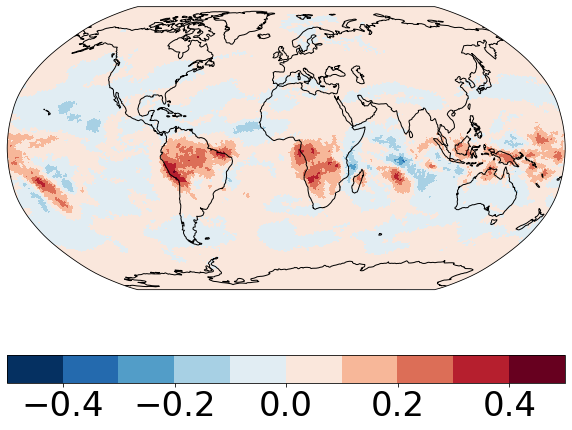

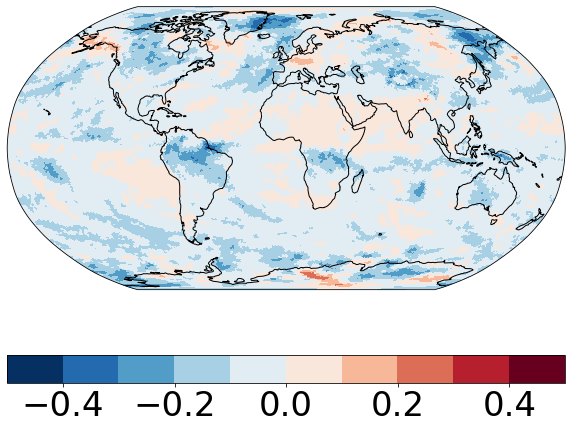

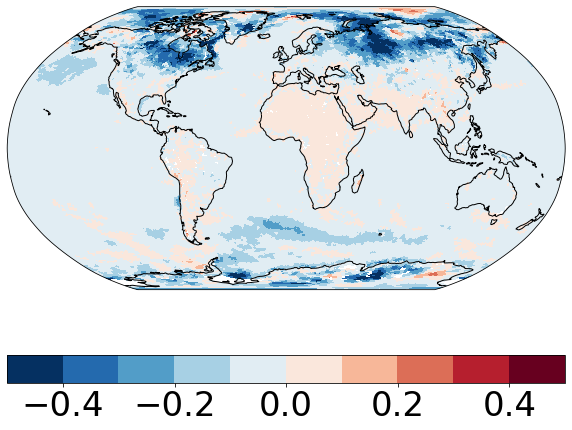

In [91]:
bounds = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]

maps = psy.plot.mapplot(os.path.join('~/bd1179_work/ERA5/hvcg_data/stats', 'clc_mean_202002_era5-dyamond_10.nc'), 
                        dims = {'name': 'clc'}, cticksize=34, projection='robin', cmap='RdBu_r', bounds=bounds)

maps = psy.plot.mapplot(os.path.join('~/bd1179_work/ERA5/hvcg_data/stats', 'clc_mean_202002_era5-dyamond_20.nc'), 
                        dims = {'name': 'clc'}, cticksize=34, projection='robin', cmap='RdBu_r', bounds=bounds)

maps = psy.plot.mapplot(os.path.join('~/bd1179_work/ERA5/hvcg_data/stats', 'clc_mean_202002_era5-dyamond_30.nc'), 
                        dims = {'name': 'clc'}, cticksize=34, projection='robin', cmap='RdBu_r', bounds=bounds)

**Relative differences:** Somehow psyplot has issue with those. Use Paraview to plot these relative differences.

### Cloud Water

In [14]:
dya_ds = xr.open_mfdataset(path_dya + 'clw/*' + days_dya + '*', combine='by_coords')
era5_ds = xr.open_mfdataset(path_era5 + 'clwc/*' + days_era5 + '*', combine='by_coords')

In [15]:
# Hourly ERA5 data
era5_hourly = era5_ds.clwc.values

dya = np.reshape(dya_ds.clw.values, -1)
# Convert ERA5 data into three-hourly data
era5 = np.reshape(era5_hourly[0::3], -1)

# # Commented out for all data
# era5 = era5[:len(dya)]

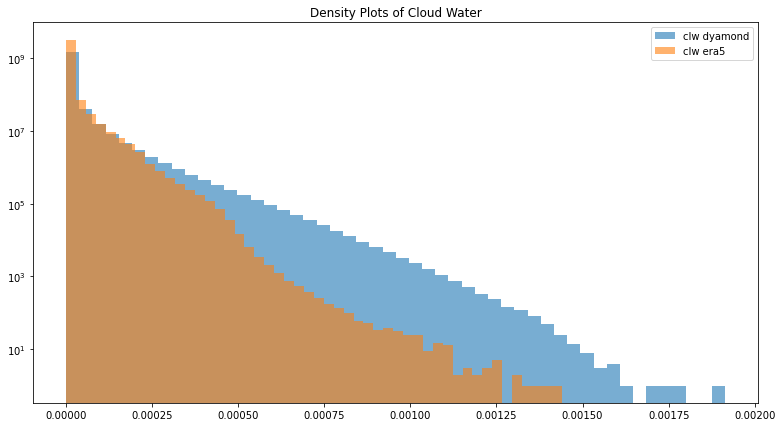

In [16]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111, title='Density Plots of Cloud Water')
ax.hist(dya, bins=50, alpha=.6, log=True)
ax.hist(era5, bins=50, alpha=.6, log=True)

plt.legend(['clw dyamond', 'clw era5'])
plt.savefig('cloud_water.pdf')

### Cloud Ice

In [115]:
dya_ds = xr.open_mfdataset(path_dya + 'cli/*' + days_dya + '*', combine='by_coords')
era5_ds = xr.open_mfdataset(path_era5 + 'ciwc/*' + days_era5 + '*', combine='by_coords')

In [116]:
# Hourly ERA5 data
era5_hourly = era5_ds.ciwc.values

dya = np.reshape(dya_ds.cli.values, -1)
# Convert ERA5 data into three-hourly data
era5 = np.reshape([era5_hourly[3*k] for k in range(era5_hourly.shape[0]//3)], -1)

era5 = era5[:len(dya)]

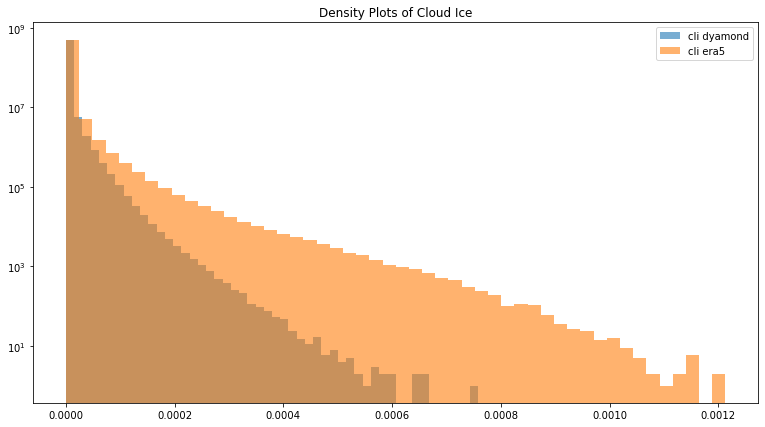

In [117]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111, title='Density Plots of Cloud Ice')
ax.hist(dya, bins=50, alpha=.6, log=True)
ax.hist(era5, bins=50, alpha=.6, log=True)

plt.legend(['cli dyamond', 'cli era5'])
plt.savefig('cloud_ice.pdf')

### Temperature

In [118]:
dya_ds = xr.open_mfdataset(path_dya + 'ta/*' + days_dya + '*', combine='by_coords')
era5_ds = xr.open_mfdataset(path_era5 + 't/*' + days_era5 + '*', combine='by_coords')

In [119]:
# Hourly ERA5 data
era5_hourly = era5_ds.t.values

dya = np.reshape(dya_ds.ta.values, -1)
# Convert ERA5 data into three-hourly data
era5 = np.reshape([era5_hourly[3*k] for k in range(era5_hourly.shape[0]//3)], -1)

era5 = era5[:len(dya)]

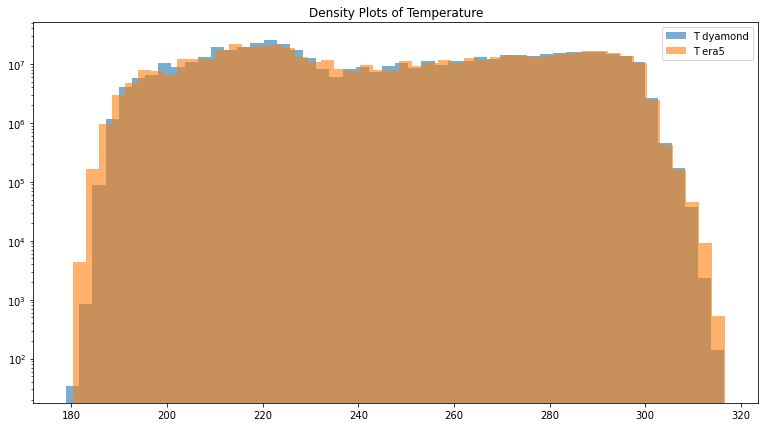

In [120]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111, title='Density Plots of Temperature')
ax.hist(dya, bins=50, alpha=.6, log=True)
ax.hist(era5, bins=50, alpha=.6, log=True)

plt.legend(['T dyamond', 'T era5'])
plt.savefig('temperature.pdf')

### Winds

In [121]:
dya_ds = xr.open_mfdataset(path_dya + 'ua/*' + days_dya + '*', combine='by_coords')
era5_ds = xr.open_mfdataset(path_era5 + 'u/*' + days_era5 + '*', combine='by_coords')

In [122]:
# Hourly ERA5 data
era5_hourly = era5_ds.u.values

dya = np.reshape(dya_ds.ua.values, -1)
# Convert ERA5 data into three-hourly data
era5 = np.reshape([era5_hourly[3*k] for k in range(era5_hourly.shape[0]//3)], -1)

era5 = era5[:len(dya)]

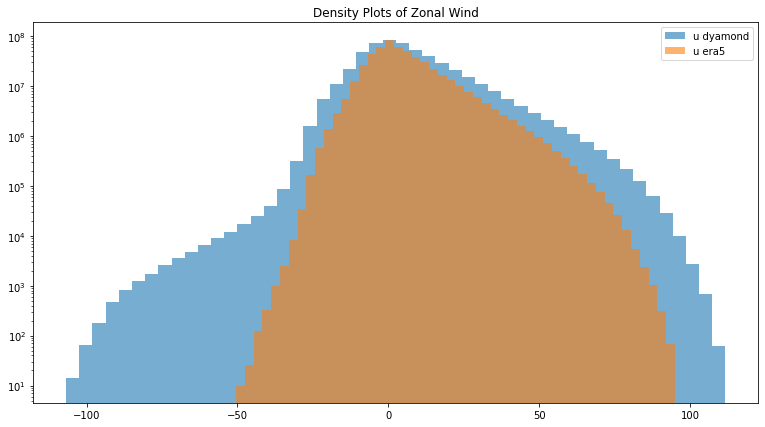

In [123]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111, title='Density Plots of Zonal Wind')
ax.hist(dya, bins=50, alpha=.6, log=True)
ax.hist(era5, bins=50, alpha=.6, log=True)

plt.legend(['u dyamond', 'u era5'])
plt.savefig('zonal_wind.pdf')

In [124]:
dya_ds = xr.open_mfdataset(path_dya + 'va/*' + days_dya + '*', combine='by_coords')
era5_ds = xr.open_mfdataset(path_era5 + 'v/*' + days_era5 + '*', combine='by_coords')

In [125]:
# Hourly ERA5 data
era5_hourly = era5_ds.v.values

dya = np.reshape(dya_ds.va.values, -1)
# Convert ERA5 data into three-hourly data
era5 = np.reshape([era5_hourly[3*k] for k in range(era5_hourly.shape[0]//3)], -1)

era5 = era5[:len(dya)]

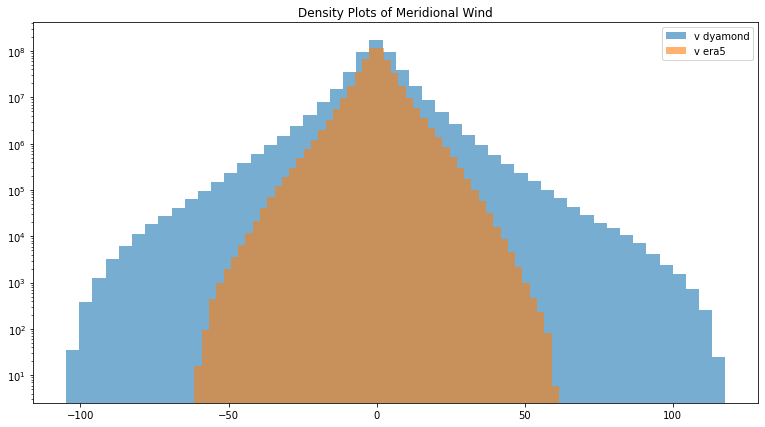

In [126]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111, title='Density Plots of Meridional Wind')
ax.hist(dya, bins=50, alpha=.6, log=True)
ax.hist(era5, bins=50, alpha=.6, log=True)

plt.legend(['v dyamond', 'v era5'])
plt.savefig('meridional_wind.pdf')

### Specific humidity

In [127]:
dya_ds = xr.open_mfdataset(path_dya + 'hus/*' + days_dya + '*', combine='by_coords')
era5_ds = xr.open_mfdataset(path_era5 + 'q/*' + days_era5 + '*', combine='by_coords')

In [128]:
# Hourly ERA5 data
era5_hourly = era5_ds.q.values

dya = np.reshape(dya_ds.hus.values, -1)
# Convert ERA5 data into three-hourly data
era5 = np.reshape([era5_hourly[3*k] for k in range(era5_hourly.shape[0]//3)], -1)

era5 = era5[:len(dya)]

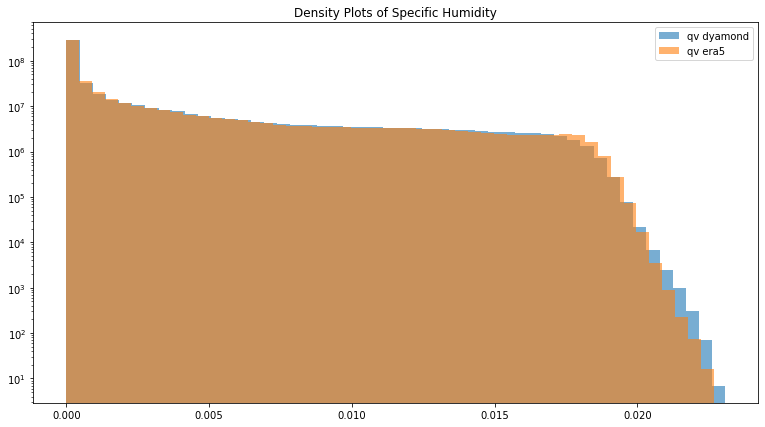

In [129]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111, title='Density Plots of Specific Humidity')
ax.hist(dya, bins=50, alpha=.6, log=True)
ax.hist(era5, bins=50, alpha=.6, log=True)

plt.legend(['qv dyamond', 'qv era5'])
plt.savefig('specific_humidity.pdf')

### Pressure

In [130]:
dya_ds = xr.open_mfdataset(path_dya + 'pa/*' + days_dya + '*', combine='by_coords')
era5_ds = xr.open_mfdataset(path_era5 + 'pa/*' + days_era5 + '*', combine='by_coords')

In [131]:
# Hourly ERA5 data
era5_hourly = era5_ds.pa.values

dya = np.reshape(dya_ds.pa.values, -1)
# Convert ERA5 data into three-hourly data
era5 = np.reshape([era5_hourly[3*k] for k in range(era5_hourly.shape[0]//3)], -1)

era5 = era5[:len(dya)]

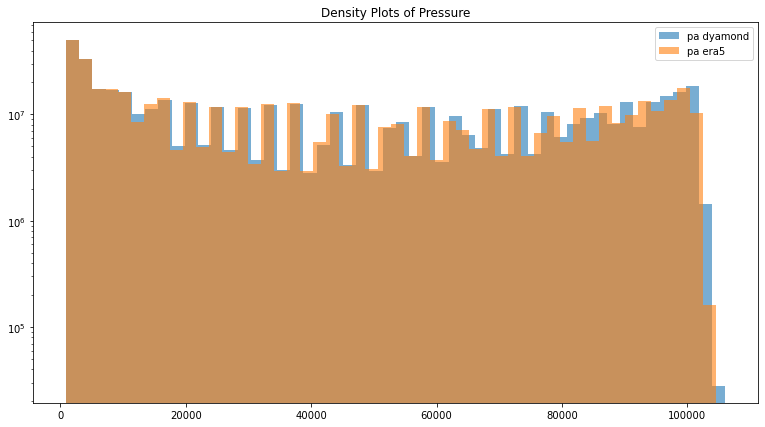

In [132]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111, title='Density Plots of Pressure')
ax.hist(dya, bins=50, alpha=.6, log=True)
ax.hist(era5, bins=50, alpha=.6, log=True)

plt.legend(['pa dyamond', 'pa era5'])
plt.savefig('pressure.pdf')

### Combine relative humidity, cloud ice & water, temperature

In [4]:
dya_ds_qc = xr.open_mfdataset(path_dya + 'clw/*' + days_dya + '*', combine='by_coords')
era5_ds_qc = xr.open_mfdataset(path_era5 + 'clwc/*' + days_era5 + '*', combine='by_coords')

dya_ds_qc = np.reshape(np.float32(dya_ds_qc.clw.values), -1)
era5_ds_qc = np.reshape(np.float32(era5_ds_qc.clwc.values), -1)

dya_ds_qi = xr.open_mfdataset(path_dya + 'cli/*' + days_dya + '*', combine='by_coords')
era5_ds_qi = xr.open_mfdataset(path_era5 + 'ciwc/*' + days_era5 + '*', combine='by_coords')

dya_ds_qi = np.reshape(np.float32(dya_ds_qi.cli.values), -1)
era5_ds_qi = np.reshape(np.float32(era5_ds_qi.ciwc.values), -1)

dya_ds_t = xr.open_mfdataset(path_dya + 'ta/*' + days_dya + '*', combine='by_coords')
era5_ds_t = xr.open_mfdataset(path_era5 + 't/*' + days_era5 + '*', combine='by_coords')

dya_ds_t = np.reshape(np.float32(dya_ds_t.ta.values), -1)
era5_ds_t = np.reshape(np.float32(era5_ds_t.t.values), -1)

# For relative humidity
dya_ds_p = xr.open_mfdataset(path_dya + 'pa/*' + days_dya + '*', combine='by_coords')
era5_ds_p = xr.open_mfdataset(path_era5 + 'pa/*' + days_era5 + '*', combine='by_coords')

dya_ds_p = np.reshape(np.float32(dya_ds_p.pa.values), -1)
era5_ds_p = np.reshape(np.float32(era5_ds_p.pa.values), -1)

dya_ds_qv = xr.open_mfdataset(path_dya + 'hus/*' + days_dya + '*', combine='by_coords')
era5_ds_qv = xr.open_mfdataset(path_era5 + 'q/*' + days_era5 + '*', combine='by_coords')

dya_ds_qv = np.reshape(np.float32(dya_ds_qv.hus.values), -1)
era5_ds_qv = np.reshape(np.float32(era5_ds_qv.q.values), -1)

T0 = 273.15
r_dya = 0.00263*dya_ds_p*dya_ds_qv*np.exp((17.67*(dya_ds_t-T0))/(dya_ds_t-29.65))**(-1)
r_era5 = 0.00263*era5_ds_p*era5_ds_qv*np.exp((17.67*(era5_ds_t-T0))/(era5_ds_t-29.65))**(-1)

In [15]:
# Increase the general font size
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['axes.labelsize'] = 'x-large' # For an axes xlabel and ylabel
mpl.rcParams['axes.titlesize'] = 'x-large'
mpl.rcParams['xtick.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'xx-large'

KeyboardInterrupt: 

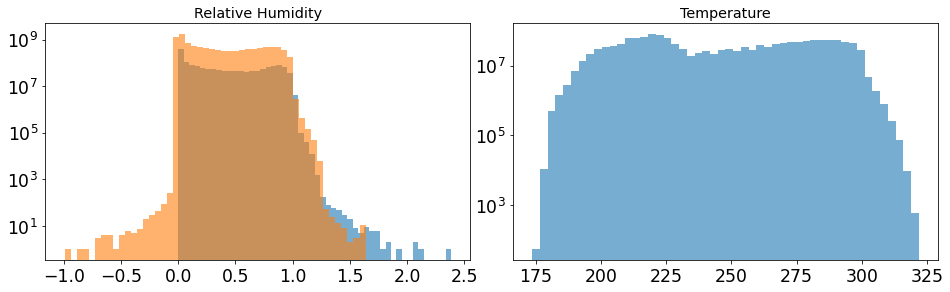

In [25]:
# Setting up the figure
fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['Relative Humidity', 'Temperature', 'Cloud Ice', 'Cloud Water']

d_dya = {0: r_dya, 1: dya_ds_t, 2: dya_ds_qi, 3: dya_ds_qc}
d_era5 = {0: r_era5, 1: era5_ds_t, 2: era5_ds_qi, 3: era5_ds_qc}

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(2,2,i+1)
    axis = axes[:i] + axes[(i+1):]
                
    plt.title(title_name)
    
    ax.hist(d_dya[i], bins=50, alpha=.6, log=True)
    ax.hist(d_era5[i], bins=50, alpha=.6, log=True)
    
    # plt.xlabel('Number of locations')
    # plt.ylabel('ERA5 MSE')
    # plt.ylim([50,350])
    # plt.legend()

In [ ]:
# Setting up the figure
fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['Relative Humidity', 'Temperature', 'Cloud Ice', 'Cloud Water']

d_dya = {0: r_dya, 1: dya_ds_t, 2: dya_ds_qi, 3: dya_ds_qc}
d_era5 = {0: r_era5, 1: era5_ds_t, 2: era5_ds_qi, 3: era5_ds_qc}

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(2,2,i+1)
    axis = axes[:i] + axes[(i+1):]
                
    plt.title(title_name)
    
    ax.hist(d_dya[i], bins=50, alpha=.6, log=False)
    ax.hist(d_era5[i], bins=50, alpha=.6, log=False)
    
    # plt.xlabel('Number of locations')
    # plt.ylabel('ERA5 MSE')
    # plt.ylim([50,350])
    # plt.legend()

### Plot by loading from data

~/my_work/Miniconda3/envs/clouds/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


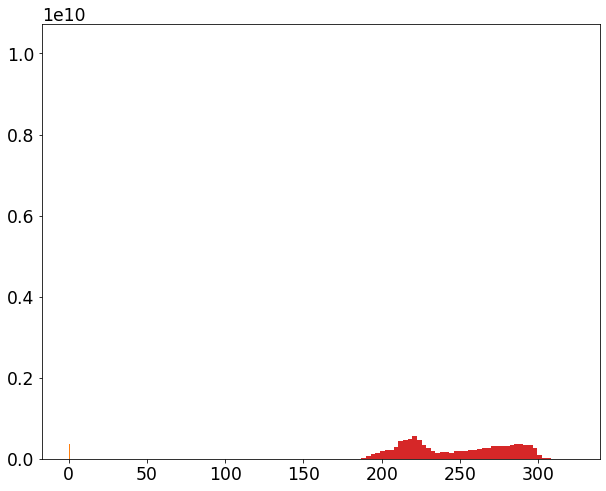

In [36]:
## Store as npy files

# X = plt.hist(d_dya[0], bins=50)
# Y = plt.hist(d_era5[0], bins=50)
# np.save('r_dya_50_bins.npy', X)
# np.save('r_era5_50_bins.npy', Y)

# X = plt.hist(d_dya[1], bins=50)
# Y = plt.hist(d_era5[1], bins=50)
# np.save('T_dya_50_bins.npy', X)
# np.save('T_era5_50_bins.npy', Y)

# X = plt.hist(d_dya[2], bins=50)
# Y = plt.hist(d_era5[2], bins=50)
# np.save('qi_dya_50_bins.npy', X)
# np.save('qi_era5_50_bins.npy', Y)

# X = plt.hist(d_dya[3], bins=50)
# Y = plt.hist(d_era5[3], bins=50)
# np.save('qc_dya_50_bins.npy', X)
# np.save('qc_era5_50_bins.npy', Y)

In [13]:
path = '~/workspace_icon-ml/reanalysis/analyze_data/all_data/'

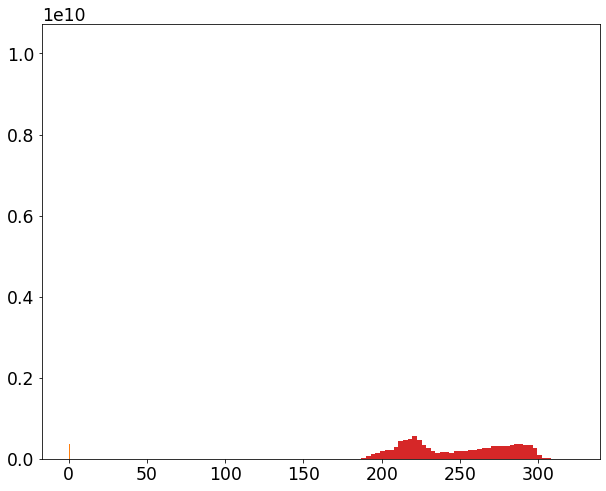

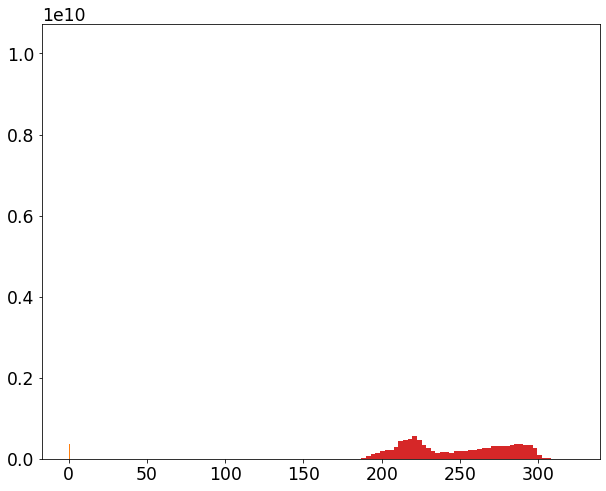

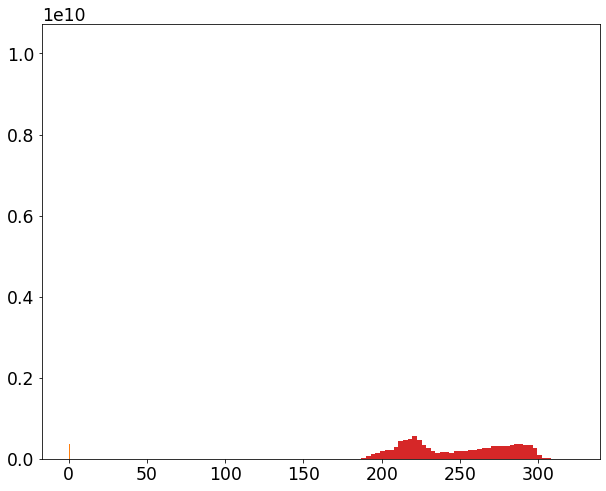

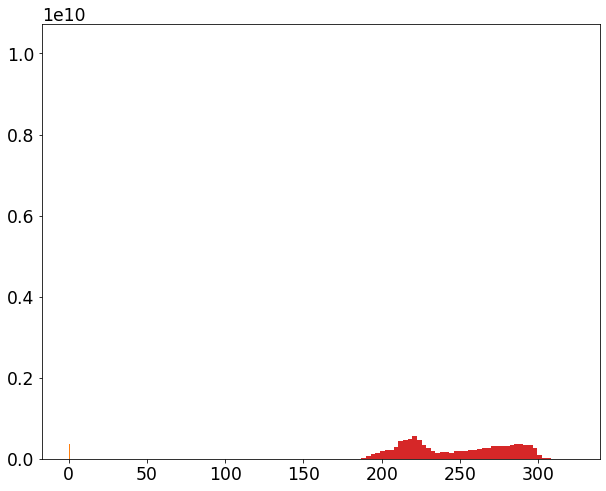

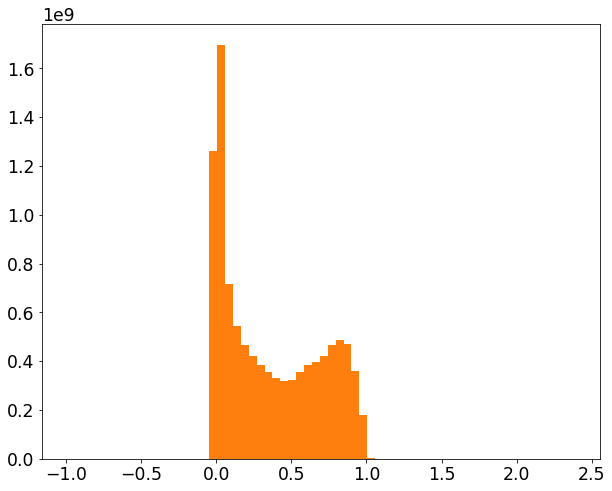

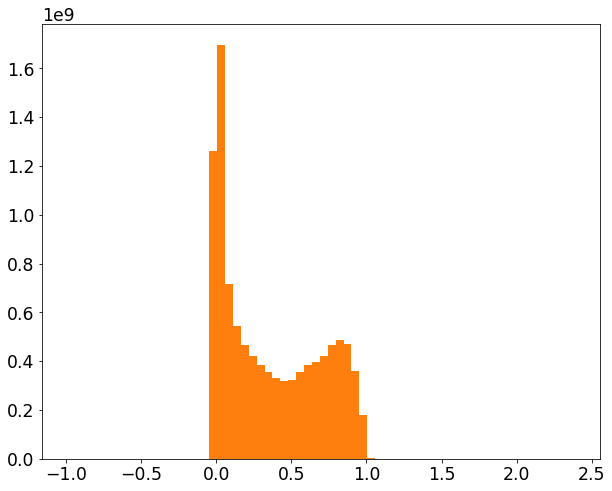

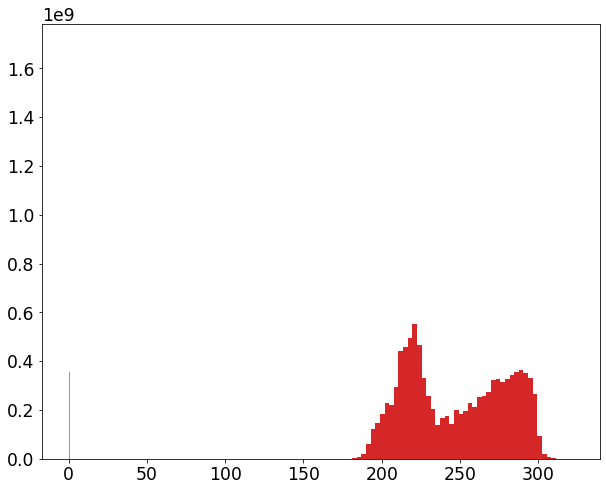

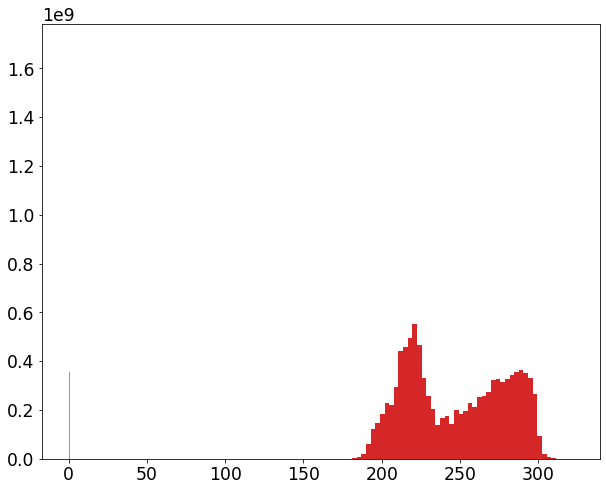

In [14]:
dya_ds_qc = np.load(path + 'qc_dya_50_bins.npy', allow_pickle=True)
era5_ds_qc = np.load(path + 'qc_era5_50_bins.npy', allow_pickle=True)
dya_ds_qi = np.load(path + 'qi_dya_50_bins.npy', allow_pickle=True)
era5_ds_qi = np.load(path + 'qi_era5_50_bins.npy', allow_pickle=True)
r_dya = np.load(path + 'r_dya_50_bins.npy', allow_pickle=True)
r_era5 = np.load(path + 'r_era5_50_bins.npy', allow_pickle=True)
dya_ds_t = np.load(path + 'T_dya_50_bins.npy', allow_pickle=True)
era5_ds_t = np.load(path + 'T_era5_50_bins.npy', allow_pickle=True)

In [156]:
# Increase the general font size
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['axes.labelsize'] = 'x-large' # For an axes xlabel and ylabel
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'xx-large'

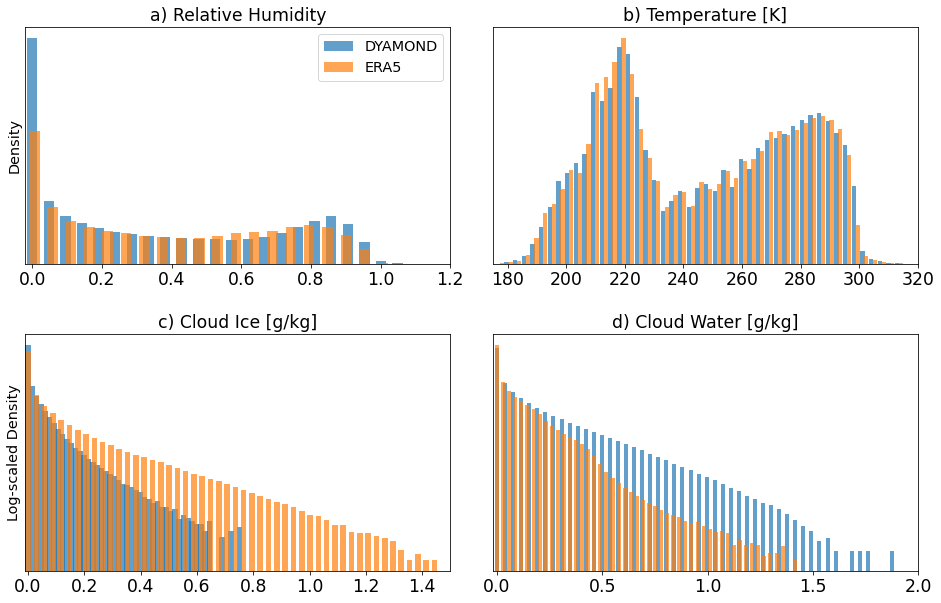

In [140]:
# Setting up the figure
fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['a) Relative Humidity', 'b) Temperature [K]', 'c) Cloud Ice [g/kg]', 'd) Cloud Water [g/kg]']

d_dya = {0: r_dya, 1: dya_ds_t, 2: dya_ds_qi, 3: dya_ds_qc}
d_era5 = {0: r_era5, 1: era5_ds_t, 2: era5_ds_qi, 3: era5_ds_qc}

xrange = {0: [-0.02, 1.2], 1: [175, 320], 2: [1000*-1e-5, 1000*0.0015], 3: [1000*-2e-5, 1000*0.002]}
widths = {0: 0.03, 1: 1.48, 2: 1000*2e-5, 3: 1000*1.91e-5}

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(2,2,i+1)
    axis = axes[:i] + axes[(i+1):]
                
    plt.title(title_name)
    
    dx_dya = (d_dya[i][1][1] - d_dya[i][1][0])
    int_dya = np.sum(d_dya[i][0])*dx_dya

    dx_era5 = (d_era5[i][1][1] - d_era5[i][1][0])
    int_era5 = np.sum(d_era5[i][0])*dx_era5

    if i in [0,1]:
        plt.bar(d_dya[i][1][:-1], d_dya[i][0]/int_dya, width=widths[i], alpha=.7)
        plt.bar(d_era5[i][1][:-1], d_era5[i][0]/int_era5, width=widths[i], alpha=.7)
    elif i in [2,3]:
        plt.bar(1000*d_dya[i][1][:-1], d_dya[i][0]/int_dya, width=widths[i], alpha=.7)
        plt.bar(1000*d_era5[i][1][:-1], d_era5[i][0]/int_era5, width=widths[i], alpha=.7)
    plt.xlim(xrange[i])
    
    if i == 0:
        plt.legend(['DYAMOND', 'ERA5'])
    
    if i in [2,3]:
        plt.yscale('log')
        
    if i == 0:
        plt.ylabel('Density')
        
    if i == 2:
        plt.ylabel('Log-scaled Density')
        
    plt.yticks(ticks=[])

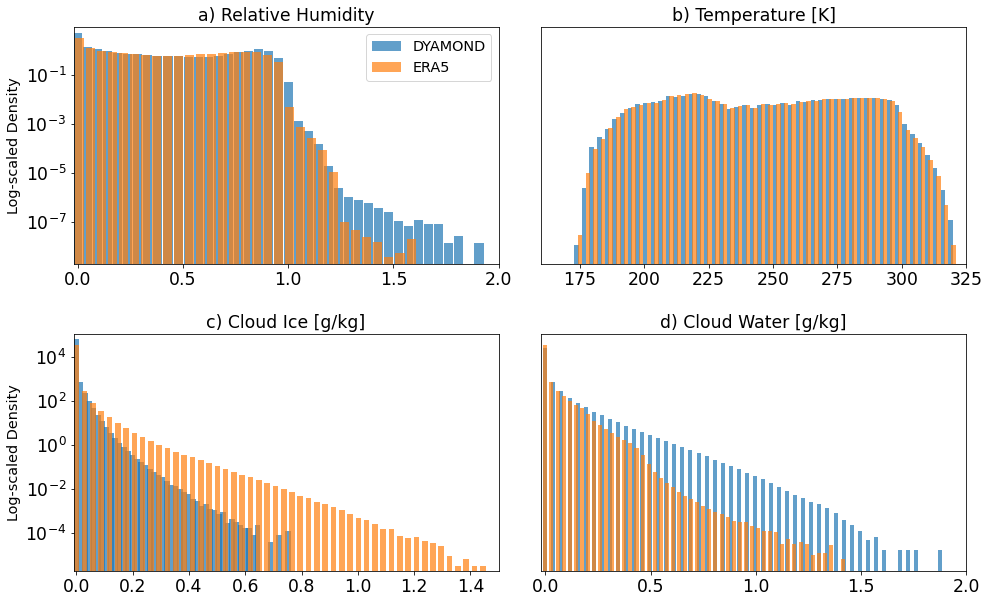

In [169]:
# Setting up the figure
fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

plot_titles = ['a) Relative Humidity', 'b) Temperature [K]', 'c) Cloud Ice [g/kg]', 'd) Cloud Water [g/kg]']

d_dya = {0: r_dya, 1: dya_ds_t, 2: dya_ds_qi, 3: dya_ds_qc}
d_era5 = {0: r_era5, 1: era5_ds_t, 2: era5_ds_qi, 3: era5_ds_qc}

xrange = {0: [-0.02, 2], 1: [160, 325], 2: [1000*-1e-5, 1000*0.0015], 3: [1000*-2e-5, 1000*0.002]}
widths = {0: 0.043, 1: 1.75, 2: 1000*2e-5, 3: 1000*1.91e-5}

axes = tuple(np.arange(len(plot_titles)))
for i, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(2,2,i+1)
    axis = axes[:i] + axes[(i+1):]
                
    plt.title(title_name)
    
    dx_dya = (d_dya[i][1][1] - d_dya[i][1][0])
    int_dya = np.sum(d_dya[i][0])*dx_dya

    dx_era5 = (d_era5[i][1][1] - d_era5[i][1][0])
    int_era5 = np.sum(d_era5[i][0])*dx_era5

    if i in [0,1]:
        plt.bar(d_dya[i][1][:-1], d_dya[i][0]/int_dya, width=widths[i], alpha=.7)
        plt.bar(d_era5[i][1][:-1], d_era5[i][0]/int_era5, width=widths[i], alpha=.7)
    elif i in [2,3]:
        plt.bar(1000*d_dya[i][1][:-1], d_dya[i][0]/int_dya, width=widths[i], alpha=.7)
        plt.bar(1000*d_era5[i][1][:-1], d_era5[i][0]/int_era5, width=widths[i], alpha=.7)
    plt.xlim(xrange[i])
    
    if i == 0:
        plt.legend(['DYAMOND', 'ERA5'])
    
    plt.yscale('log')
        
    if i in [0,1]:
        plt.ylim([2e-9, 9])
        
    if i in [2,3]:
        plt.ylim([2e-6, 1e5])
        
    if i in [0, 2]:
        plt.ylabel('Log-scaled Density')
        
    if i in [1, 3]:
        plt.yticks(ticks=[])
        
plt.savefig('./all_data/era5_dyamond_comp_4_vars.pdf')